<a href="https://colab.research.google.com/github/avs20/SioLabsPython0/blob/main/36%20Sklearn_and_Linear_Regression%20-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load Dataset -> CSV file, Database, Web API , Files, Self.
2. Import Algorithm - Linear Regression for today
3. Training / Fitting the Algorithm - Searching for the best line 
4. Getting predictions 
5. For the case of Linear Reg - How to get manual predictions
7. Getting the goodness of fit - RMSE / R-squared R^2



## 1. Load Dataset -> CSV file, Database, Web API , Files, Self.


In [1]:
import sklearn 


In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [5]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

data['DESCR']

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X = data['data']

In [8]:
type(X)

numpy.ndarray

In [9]:
X.shape

(506, 13)

In [10]:
y = data['target']

In [11]:
type(y)

numpy.ndarray

In [12]:
y.shape

(506,)

## 2. Import Algorithm - Linear Regression for today


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# create the object 
lreg = LinearRegression()

## 3. Training / Fitting the Algorithm - Searching for the best line 

In [15]:
# this is finding the best line i.e. best m (m1 -> m13) and b given the data points
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# to find the coefficients and parameters we use .coef_ and .intercept_ attributes
print(lreg.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [17]:
print(lreg.intercept_)

36.459488385090125


## 4. Getting predictions 

In [19]:
lreg.predict([[100]])

ValueError: ignored

In [20]:
# to get predictions we use .predict() 
preds = lreg.predict(X)

In [21]:
preds.shape

(506,)

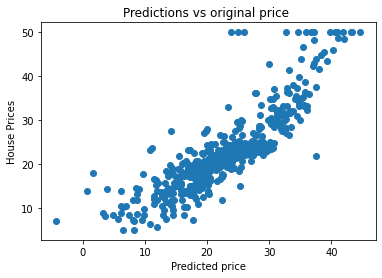

In [23]:
# preds is what the linear regression model gives the price of the house 
# we also have original prices in the MEDV column or y 

# let's make a scatter plot of preds and y 
import matplotlib.pyplot as plt 
%matplotlib inline 

fig, ax = plt.subplots()
ax.scatter(preds, y)
ax.set_title('Predictions vs original price ')
ax.set_xlabel('Predicted price')
ax.set_ylabel('House Prices')
plt.show()

In [25]:
preds

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [26]:
import numpy as np 

In [27]:
X_trans = X.transpose()


In [44]:
M = lreg.coef_.reshape(13,1)

In [45]:
M.shape

(13, 1)

In [36]:
B = lreg.intercept_
B

36.459488385090125

In [41]:
X.shape

(506, 13)

In [46]:
preds_manual = np.matmul(X,M) + B
preds_manual.transpose()

array([[30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
        25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
        18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
        19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
        12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
        13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
        11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
        23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
        34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
        22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
        21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
        31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
        17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
        30.36148358, 25.53056512, 21.11338564, 17.4

In [47]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 7. Getting the goodness of fit - RMSE / R-squared R^2

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
r2_score(y, preds)

0.7406426641094095

In [51]:
np.sqrt(mean_squared_error(y, preds))

4.679191295697281